In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import StandardScaler,normalize
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from datetime import date
from sklearn.mixture import GaussianMixture

import matplotlib.colors
pal = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
cmap = matplotlib.colors.ListedColormap(pal)

In [114]:
url = "https://raw.githubusercontent.com/Hanyun1126/Advanced-Data-Analysis/main/data/marketing_campaign.csv"
customer_data = pd.read_csv(url, delimiter='\t').drop_duplicates()
customer_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [115]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data Cleaning

## Check Uniqueness

In [116]:
# Check if the 'ID' column is unique
is_column_unique = customer_data['ID'].is_unique

if is_column_unique:
    print("The 'column_name' column is unique.")
else:
    print("The 'column_name' column is not unique.")

The 'column_name' column is unique.


## Check Missing Values

In [117]:
# Remove rows with missing values
# Only Income have missing vules, can the number of missing valus is reasonable, 
# so we can drop them, there are only 16 missing values since it is small enough we decide to drop them.
customer_data = customer_data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(customer_data))

The total number of data-points after removing the rows with missing values are: 2216


## Categorical Variables Assessment

In [118]:
customer_data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [119]:
customer_data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [120]:
education_dict = {
    'Graduation': 'Basic education',
    'PhD': 'Higher education',
    'Master': 'Higher education',
    'Basic': 'Basic education',
    '2n Cycle': 'Basic education'
}

marital_status_dict = {
    'Single': 'Alone',
    'Together': 'Pair',
    'Married': 'Pair',
    'Divorced': 'Alone',
    'Widow': 'Alone',
    'Absurd': 'Alone',
    'Alone': 'Alone',
    'YOLO': 'Alone',
}

In [121]:
customer_data['Education'] = customer_data['Education'].map(education_dict)
customer_data['Marital_Status'] = customer_data['Marital_Status'].map(marital_status_dict)

<ipython-input-121-d02450e7e77c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Education'] = customer_data['Education'].map(education_dict)
<ipython-input-121-d02450e7e77c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Marital_Status'] = customer_data['Marital_Status'].map(marital_status_dict)


In [122]:
customer_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Basic education,Alone,58138,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Basic education,Alone,46344,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Basic education,Pair,71613,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Basic education,Pair,26646,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Higher education,Pair,58293,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Basic education,Pair,61223,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,Higher education,Pair,64014,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Basic education,Alone,56981,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Higher education,Pair,69245,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Numerical variable Assessment

### Age column
- Calaculate the age of each customer
- remove outlier for age using IQR method

In [123]:
# Age column
customer_data['Age']= 2023 - customer_data['Year_Birth']

<ipython-input-123-1e46277f1102>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Age']= 2023 - customer_data['Year_Birth']


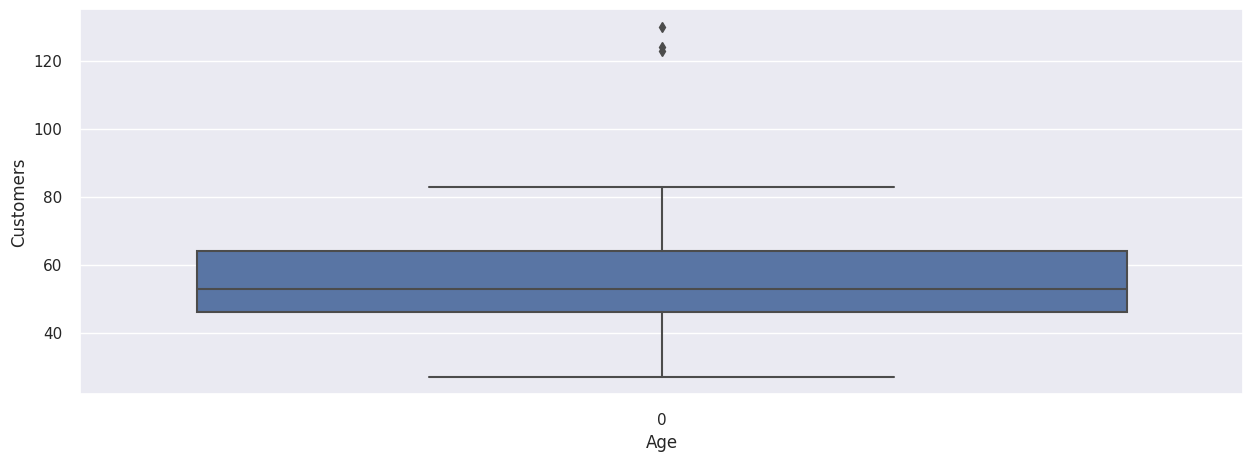

In [124]:
# take a look for Age column
# Create a box plot
sns.set(rc={'figure.figsize':(15,5)})

#Let's create the list of features that we want a boxplot for
sns.boxplot(customer_data['Age'])

# Set labels for the x-axis and y-axis
plt.xlabel('Age')
plt.ylabel('Customers')

# Display the plot
plt.show()

IQR method: Calculate the interquartile range (IQR) of the dataset and remove any data points that fall outside of a certain range. Typically, a range of 1.5 times the IQR is used. The IQR is the difference between the 75th percentile and the 25th percentile of the data.

In [125]:
# Calculate the IQR of the 'Age' column
q1 = customer_data['Age'].quantile(0.25)
q3 = customer_data['Age'].quantile(0.75)
iqr = q3 - q1

# Remove any data points that fall outside of 1.5 times the IQR
threshold = 1.5
customer_data = customer_data[(customer_data['Age'] > q1 - threshold*iqr) & (customer_data['Age'] < q3 + threshold*iqr)]

### Dt_Customer

In [126]:
customer_data["Dt_Customer"] = pd.to_datetime(customer_data["Dt_Customer"])
dates = []
for i in customer_data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


<ipython-input-126-ab588936aad3>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_data["Dt_Customer"] = pd.to_datetime(customer_data["Dt_Customer"])
<ipython-input-126-ab588936aad3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data["Dt_Customer"] = pd.to_datetime(customer_data["Dt_Customer"])


Resaonable, we do not need to do anything here.

### Income

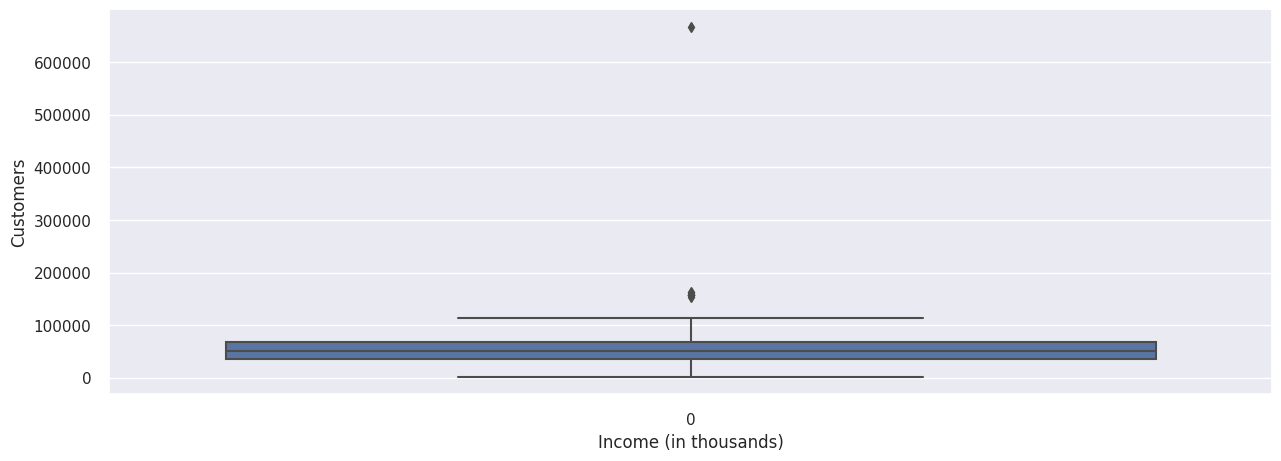

In [127]:
# take a look for Income column
# Create a box plot
sns.set(rc={'figure.figsize':(15,5)})

#Let's create the list of features that we want a boxplot for
sns.boxplot(customer_data['Income'])

# Set labels for the x-axis and y-axis
plt.xlabel('Income (in thousands)')
plt.ylabel('Customers')

# Display the plot
plt.show()

In [128]:
# Calculate the IQR of the 'column_name' column
q1 = customer_data['Income'].quantile(0.25)
q3 = customer_data['Income'].quantile(0.75)
iqr = q3 - q1

# Remove any data points that fall outside of 1.5 times the IQR
threshold = 1.5
customer_data = customer_data[(customer_data['Income'] > q1 - threshold*iqr) & (customer_data['Income'] < q3 + threshold*iqr)]

### children column

In [129]:
# Children column
# because they have the same meaning
customer_data['Children'] = customer_data['Kidhome'] + customer_data['Teenhome']

<ipython-input-129-12d1a2d8b64b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Children'] = customer_data['Kidhome'] + customer_data['Teenhome']


### Recency

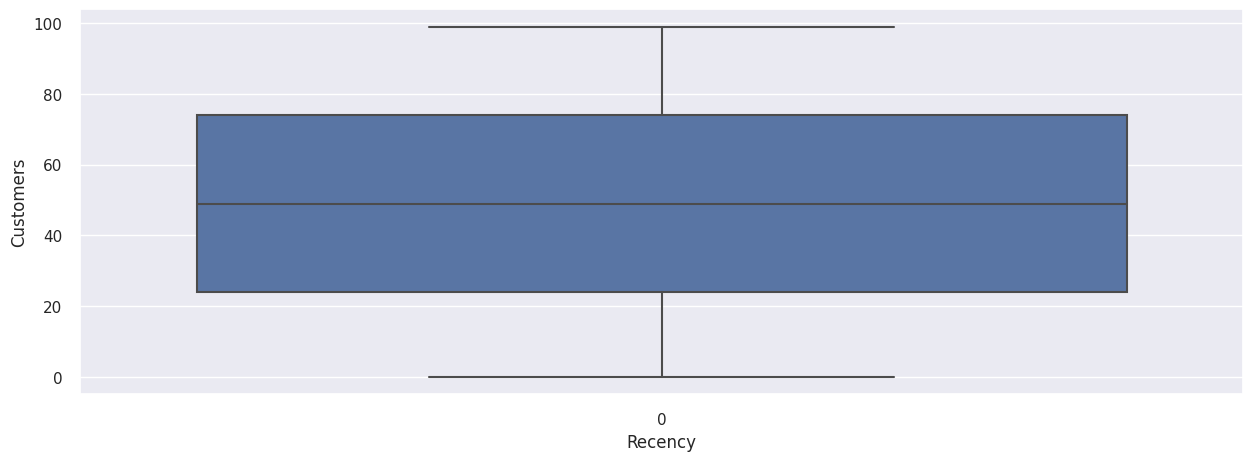

In [130]:
# take a look for Income column
# Create a box plot
sns.set(rc={'figure.figsize':(15,5)})

#Let's create the list of features that we want a boxplot for
sns.boxplot(customer_data['Recency'])

# Set labels for the x-axis and y-axis
plt.xlabel('Recency')
plt.ylabel('Customers')

# Display the plot
plt.show()

In [131]:
# Calculate the IQR of the 'column_name' column
q1 = customer_data['Recency'].quantile(0.25)
q3 = customer_data['Recency'].quantile(0.75)
iqr = q3 - q1

# Remove any data points that fall outside of 1.5 times the IQR
threshold = 1.5
customer_data = customer_data[(customer_data['Recency'] > q1 - threshold*iqr) & (customer_data['Recency'] < q3 + threshold*iqr)]

## Feature Engineering
Let's create the following features:

- Age = Current year-Year_Birth
- Total_Sales = MntWines+ MntFruits + MntMeatProducts + - - MntFishProducts + MntSweetProducts + MntGoldProds
- Total_Purchases = NumDealsPurchases + NumWebPurchases + - NumCatalogPurchases + NumStorePurchases
- Avg_Purchase = Total_Sales/Total_Purchases
- Deal_Share = NumDealsPurchases/Total_Purchases
- Web_Share = NumWebPurchases/Total_Purchases
- Catalog_Share = NumCatalogPurchases/Total_Purchases
- Store_Share = NumStorePurchases/Total_Purchases
- Family_Size = number of marriage + number of children

In [132]:
#Total_Sales = MntWines+ MntWines + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds
customer_data['Total_Sales']=customer_data['MntWines']+customer_data['MntFruits']+ \
                            customer_data['MntMeatProducts']+customer_data['MntFishProducts']+ \
                            customer_data['MntSweetProducts']+customer_data['MntGoldProds']

#Total_Purchases = NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases
customer_data['Total_Purchases']=customer_data['NumDealsPurchases']+customer_data['NumWebPurchases']+ \
                            customer_data['NumCatalogPurchases']+customer_data['NumStorePurchases']

#Avg_Purchase = Total_Sales/Total_Purchases
customer_data['Avg_Purchase']=customer_data['Total_Sales']/customer_data['Total_Purchases']

#Deal_Share = NumDealsPurchases/Total_Purchases
customer_data['Deal_Share']=customer_data['NumDealsPurchases']/customer_data['Total_Purchases']

#Web_Share = NumWebPurchases/Total_Purchases
customer_data['Web_Share']=customer_data['NumWebPurchases']/customer_data['Total_Purchases']

#Catalog_Share = NumCatalogPurchases/Total_Purchases
customer_data['Catalog_Share']=customer_data['NumCatalogPurchases']/customer_data['Total_Purchases']

#Store_Share = NumStorePurchases/Total_Purchases
customer_data['Store_Share']=customer_data['NumStorePurchases']/customer_data['Total_Purchases']

##Feature for total members in the householde
customer_data["Family_Size"] = customer_data["Marital_Status"].replace({"Alone": 1, "Pair":2})+ customer_data["Children"]

In [133]:
customer_data['Seniority']=pd.to_datetime(customer_data['Dt_Customer'], dayfirst=True,format = '%Y-%m-%d')
customer_data['Seniority'].sort_values()

724    2012-01-08
976    2012-01-08
2029   2012-01-08
2194   2012-01-08
1473   2012-01-09
          ...    
288    2014-12-05
2155   2014-12-05
50     2014-12-05
1034   2014-12-05
2003   2014-12-06
Name: Seniority, Length: 2205, dtype: datetime64[ns]

In [134]:
last_date = date(2014,12,6)
customer_data['Seniority'] = pd.to_numeric(customer_data['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30

In [135]:
customer_data = customer_data[customer_data['Total_Purchases']>0]
#let's look at the data to confirm that there are no longer purchases of 0 and avg purchase = inf
customer_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Children,Total_Sales,Total_Purchases,Avg_Purchase,Deal_Share,Web_Share,Catalog_Share,Store_Share,Family_Size,Seniority
0,5524,1957,Basic education,Alone,58138,0,0,2012-04-09,58,635,...,0,1617,25,65,0,0,0,0,1,32
1,2174,1954,Basic education,Alone,46344,1,1,2014-08-03,38,11,...,2,27,6,4,0,0,0,0,3,4
2,4141,1965,Basic education,Pair,71613,0,0,2013-08-21,26,426,...,0,776,21,37,0,0,0,0,2,16
3,6182,1984,Basic education,Pair,26646,1,0,2014-10-02,26,11,...,1,53,8,7,0,0,0,0,3,2
4,5324,1981,Higher education,Pair,58293,1,0,2014-01-19,94,173,...,1,422,19,22,0,0,0,0,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Basic education,Pair,61223,0,1,2013-06-13,46,709,...,1,1341,18,74,0,0,0,0,3,18
2236,4001,1946,Higher education,Pair,64014,2,1,2014-10-06,56,406,...,3,444,22,20,0,0,0,0,5,2
2237,7270,1981,Basic education,Alone,56981,0,0,2014-01-25,91,908,...,0,1241,19,65,0,0,0,1,1,10
2238,8235,1956,Higher education,Pair,69245,0,1,2014-01-24,8,428,...,1,843,23,37,0,0,0,0,3,11


### transformation for numerical variable

In [136]:
drop_features = ['Education','Marital_Status','Dt_Customer','ID','Year_Birth']
#Get data for scaling by removing boolean columns
df_before_scale = customer_data.drop(drop_features, axis = 1) #new data frame with numeric

# create an instance of the StandardScaler class
scaler = StandardScaler()

# fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df_before_scale)

# create a new dataframe with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_before_scale.columns)

df_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Children,Total_Sales,Total_Purchases,Avg_Purchase,Deal_Share,Web_Share,Catalog_Share,Store_Share,Family_Size,Seniority
0,0,-1,-1,0,1,2,2,2,1,1,...,-1,2,1,1,-1,1,2,-2,-2,2
1,-0,1,1,-0,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,1,-1,0,-1,0,-2
2,1,-1,-1,-1,0,1,-0,1,-0,-0,...,-1,0,1,0,-1,1,-0,1,-1,-0
3,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,-1,-1,-1,1,-0,-1,1,0,-2
4,0,1,-1,2,-0,0,-0,0,-0,-1,...,0,-0,1,-0,1,-0,0,-1,0,-1


In [137]:
# extract new features
new_features = ['Income','Recency','Total_Sales','NumWebVisitsMonth','Avg_Purchase','Deal_Share','Web_Share','Catalog_Share','Store_Share','Family_Size']
df_scaled = df_scaled.loc[:,new_features]
df_scaled

,Income,Recency,Total_Sales,NumWebVisitsMonth,Avg_Purchase,Deal_Share,Web_Share,Catalog_Share,Store_Share,Family_Size
0,0,0,2,1,1,-1,1,2,-2,-2
1,-0,-0,-1,-0,-1,1,-1,0,-1,0
2,1,-1,0,-1,0,-1,1,-0,1,-1
3,-1,-1,-1,0,-1,1,-0,-1,1,0
4,0,2,-0,-0,-0,1,-0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...
2198,0,-0,1,-0,1,-1,2,0,-2,0
2199,1,0,-0,1,-0,1,1,-0,-2,3
2200,0,1,1,0,1,-1,-2,0,2,-2
2201,1,-1,0,-1,0,-1,-0,1,0,0


### transformation for categorical variable

In [138]:
cat_features = ['Education','Marital_Status']

# apply one-hot encoding to the categorical features
df_2 = pd.get_dummies(customer_data, columns=cat_features)
df_2 = df_2.loc[:, 
                ['Education_Basic education',
                 'Education_Higher education',
                 'Marital_Status_Alone',
                 'Marital_Status_Pair']]

In [139]:
df_2 = df_2.reset_index()
df_2

,index,Education_Basic education,Education_Higher education,Marital_Status_Alone,Marital_Status_Pair
0,0,1,0,1,0
1,1,1,0,1,0
2,2,1,0,0,1
3,3,1,0,0,1
4,4,0,1,0,1
...,...,...,...,...,...
2198,2235,1,0,0,1
2199,2236,0,1,0,1
2200,2237,1,0,1,0
2201,2238,0,1,0,1


In [140]:
# Join the existing df_scaled dataframe with df_age_binned.
# Store the result back into df_scaled
merged_df = pd.concat([df_scaled, df_2],axis = 1).drop(['index'], axis=1)

In [141]:
merged_df

,Income,Recency,Total_Sales,NumWebVisitsMonth,Avg_Purchase,Deal_Share,Web_Share,Catalog_Share,Store_Share,Family_Size,Education_Basic education,Education_Higher education,Marital_Status_Alone,Marital_Status_Pair
0,0,0,2,1,1,-1,1,2,-2,-2,1,0,1,0
1,-0,-0,-1,-0,-1,1,-1,0,-1,0,1,0,1,0
2,1,-1,0,-1,0,-1,1,-0,1,-1,1,0,0,1
3,-1,-1,-1,0,-1,1,-0,-1,1,0,1,0,0,1
4,0,2,-0,-0,-0,1,-0,0,-1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,0,-0,1,-0,1,-1,2,0,-2,0,1,0,0,1
2199,1,0,-0,1,-0,1,1,-0,-2,3,0,1,0,1
2200,0,1,1,0,1,-1,-2,0,2,-2,1,0,1,0
2201,1,-1,0,-1,0,-1,-0,1,0,0,0,1,0,1


# Exploratory Data Analysis

In [142]:
# Return the data types
customer_data.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

## Age

1. Age
- How many customers per age groups do we have in this dataset?
- Relationship between age and purchasing behavior

In [143]:
# We'll take this a step further and discretize the Age data by creating bins
age_bins = [0, 18, 30, 40, 50, 60, 999]
age_labels = [
    '0-18',
    '19-30',
    '31-40',
    '41-50',
    '51-60',
    '61+'
]
customer_data['AgeBinned'] = pd.cut(customer_data['Age'], bins=age_bins, labels=age_labels)

In [144]:
customer_data['AgeBinned'].value_counts()

61+      686
51-60    611
41-50    608
31-40    283
19-30     15
0-18       0
Name: AgeBinned, dtype: int64

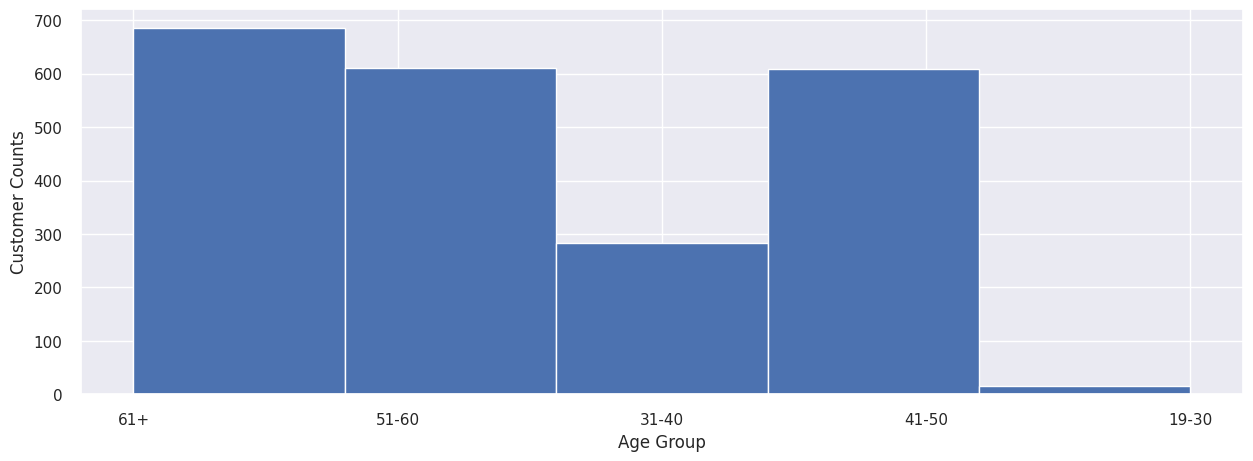

In [145]:
# Create histogram
plt.hist(customer_data['AgeBinned'], bins=5)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Customer Counts')

# Show plot
plt.show()

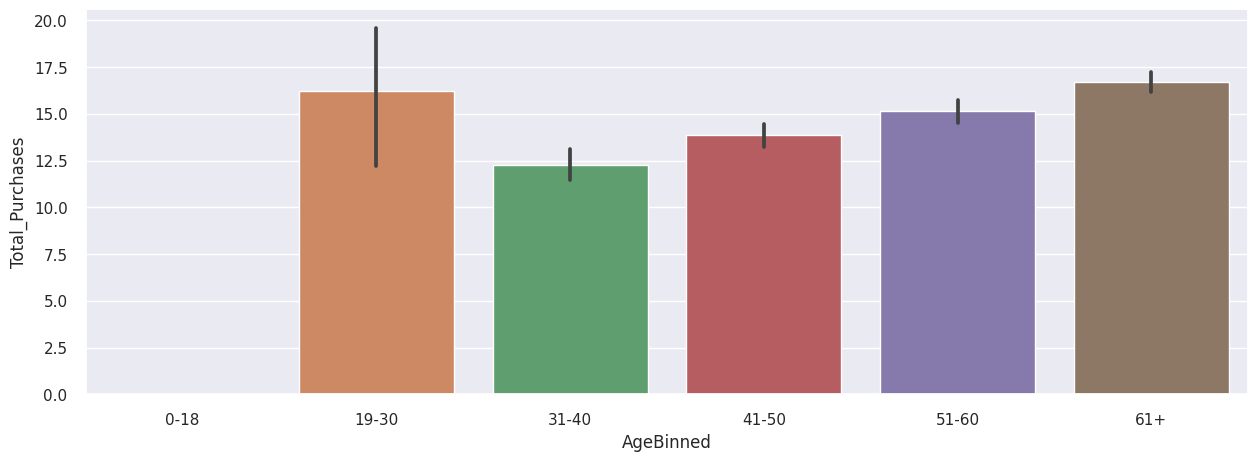

In [146]:
sns.barplot(x=customer_data['AgeBinned'], y=customer_data['Total_Purchases'])
plt.show()

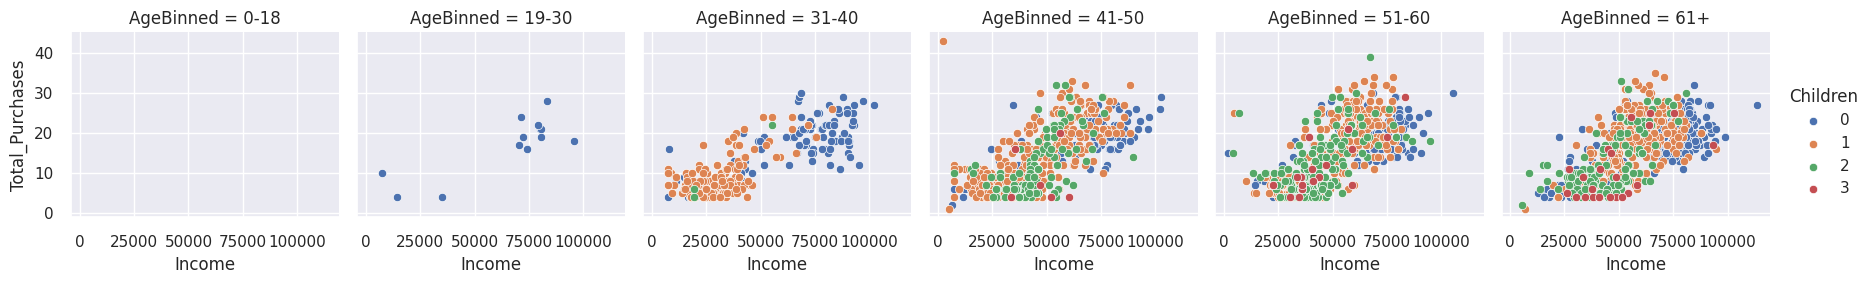

In [147]:
income_by_age = sns.FacetGrid(data=customer_data, col='AgeBinned', hue='Children')
income_by_age.map(sns.scatterplot, 'Income', 'Total_Purchases')
income_by_age.add_legend()
plt.show()

## Education Level
How many customers per education level?

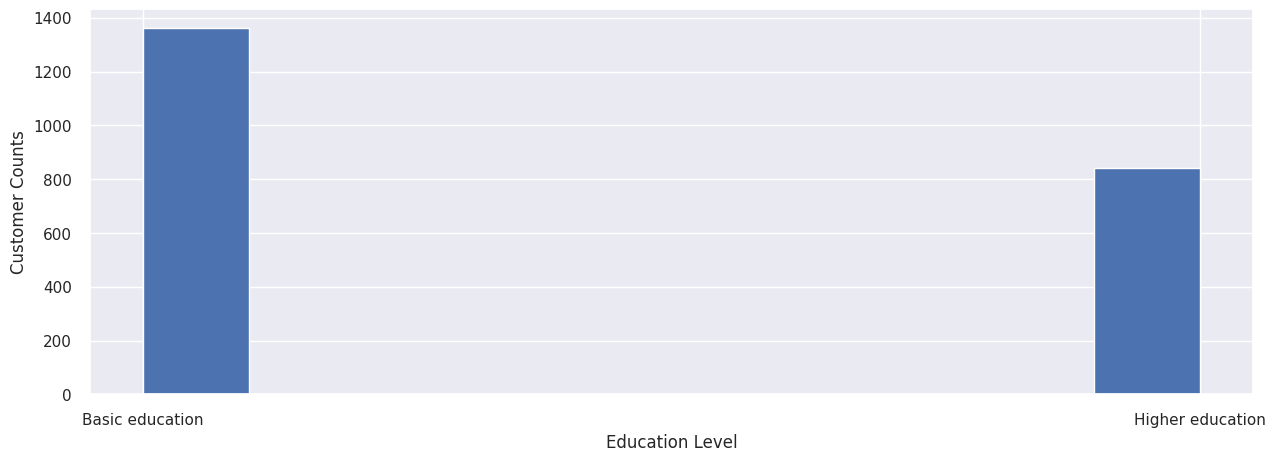

In [148]:
# Create histogram
plt.hist(customer_data['Education'])

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Customer Counts')

# Show plot
plt.show()

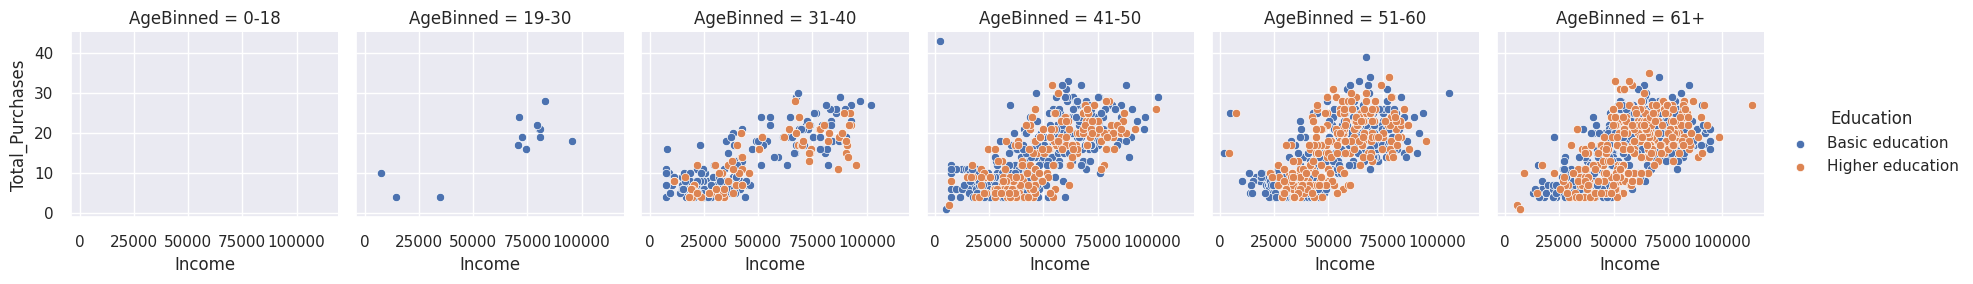

In [149]:
income_by_age = sns.FacetGrid(data=customer_data, col='AgeBinned', hue='Education')
income_by_age.map(sns.scatterplot, 'Income', 'Total_Purchases')
income_by_age.add_legend()
plt.show()

## Correlation Matrix

<Axes: >

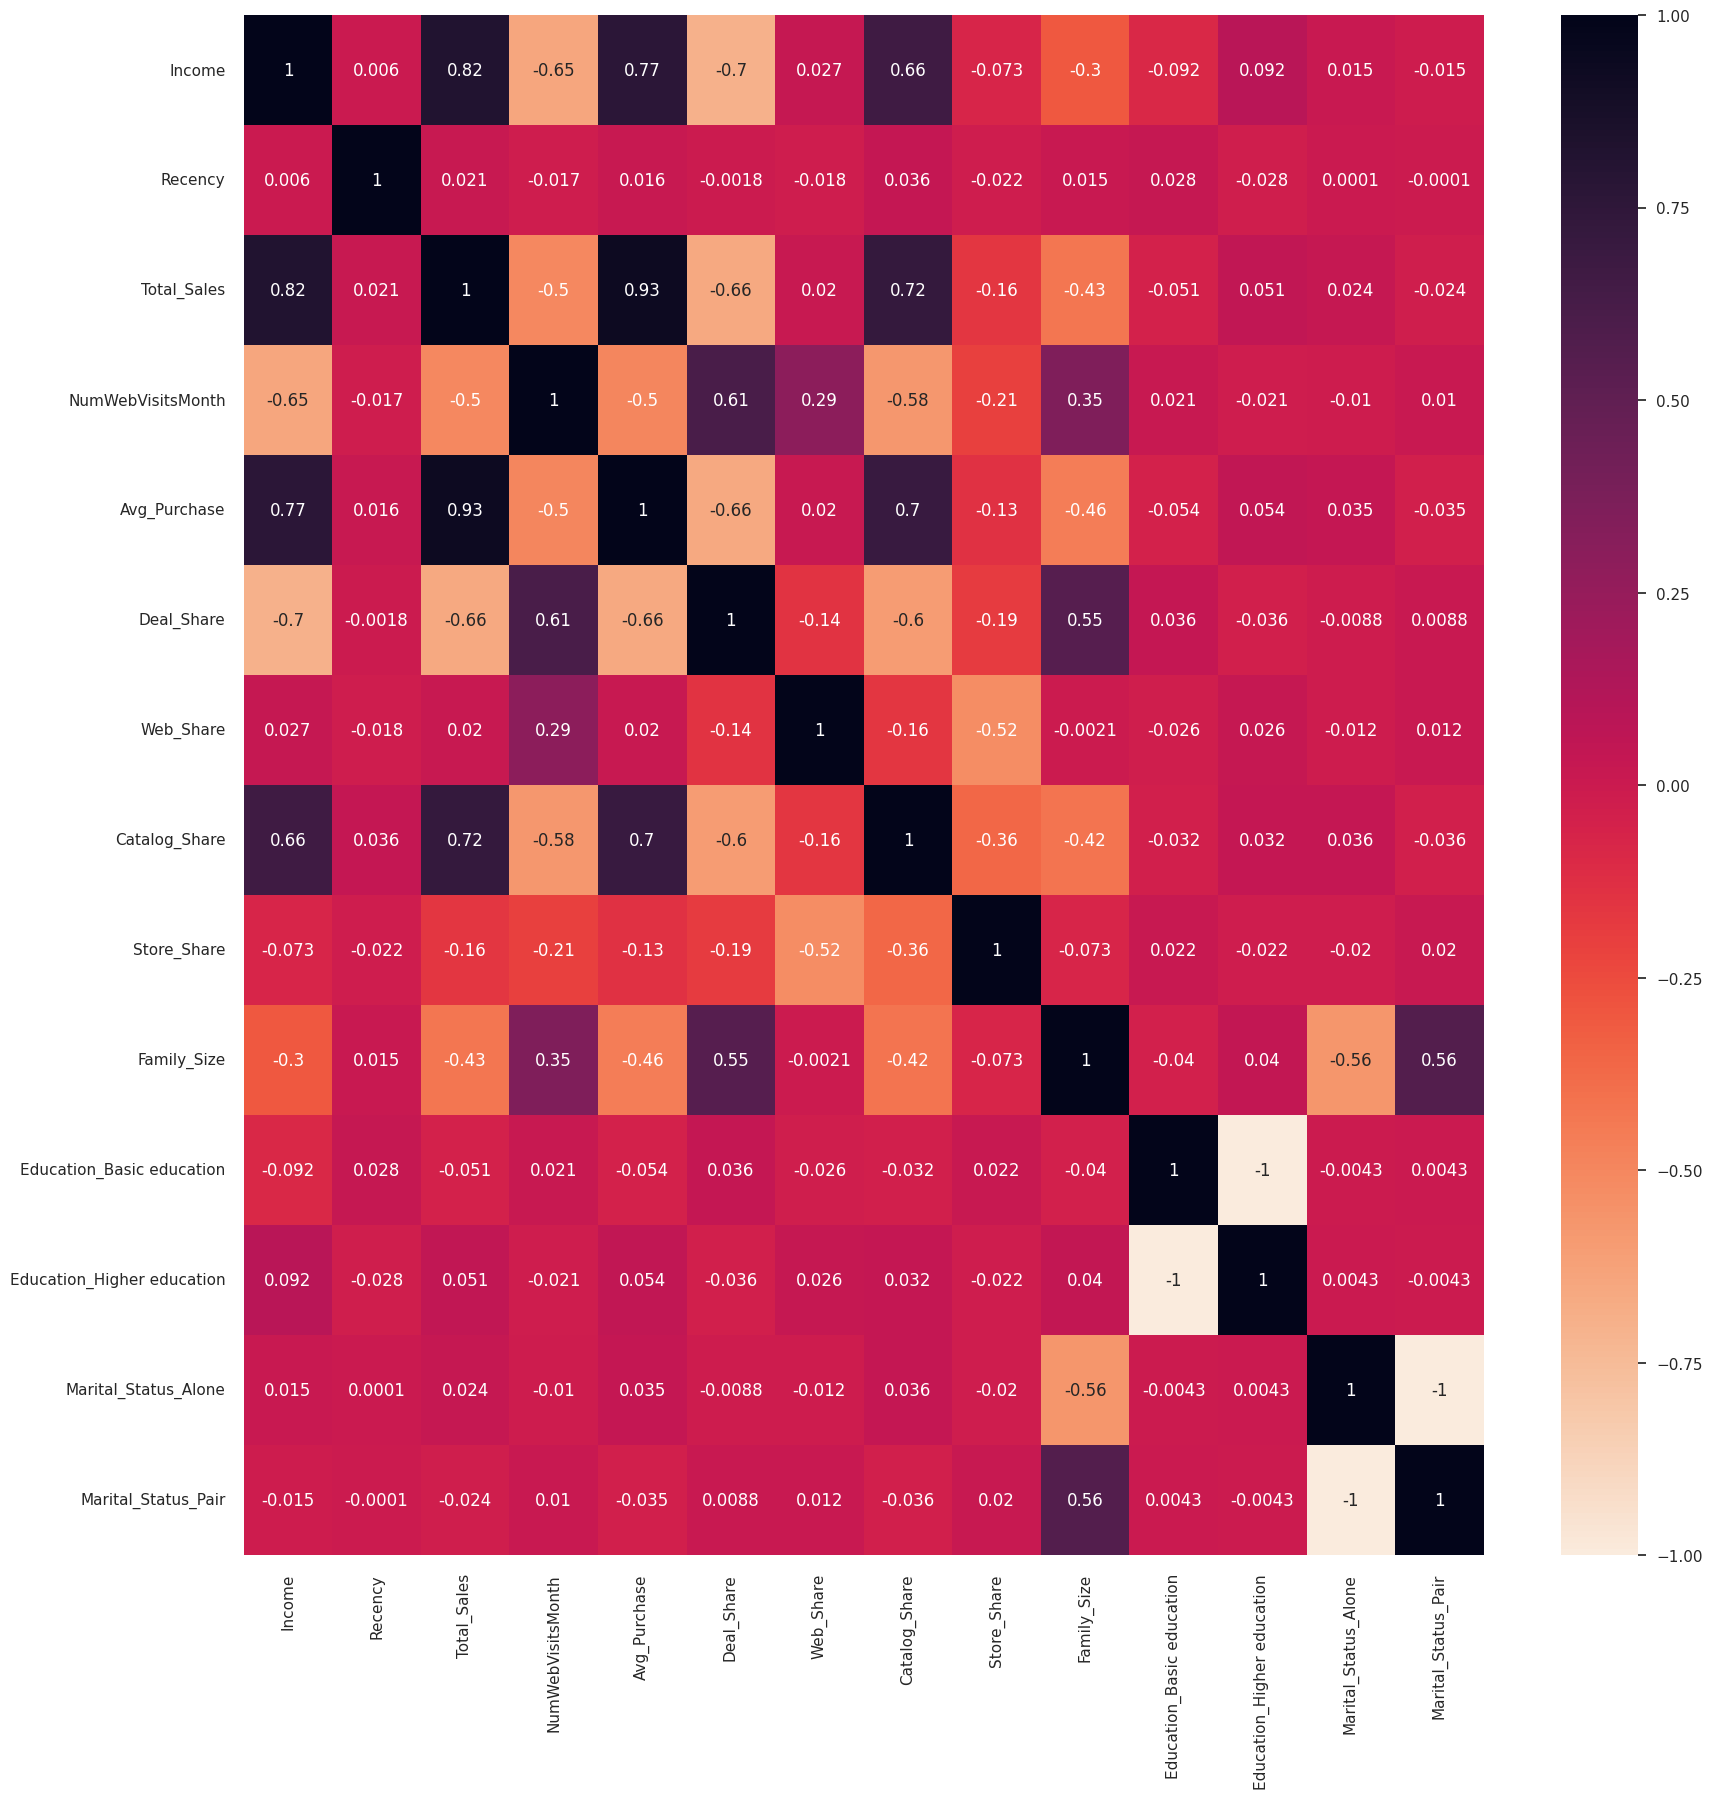

In [150]:
plt.figure(figsize=(20,20))
cmap = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(merged_df.corr(), annot=True, cmap=cmap, center=0)

# PCA


In [151]:
# Fit our standardized data using PCA
pca = PCA()

# Fit PCA on scaled data
pca.fit(merged_df)

PCA()

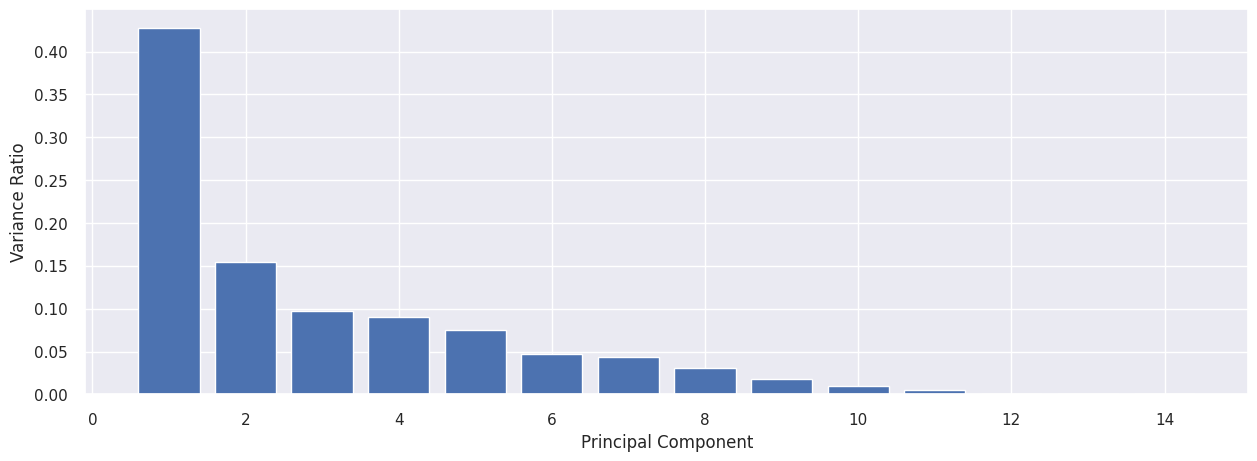

Percentage of cumulative variance of PCs:  [ 42.79009724  58.27199189  67.96292817  76.98573445  84.53348246
  89.24604457  93.55398506  96.64592621  98.49096734  99.45821057
 100.         100.         100.         100.        ]


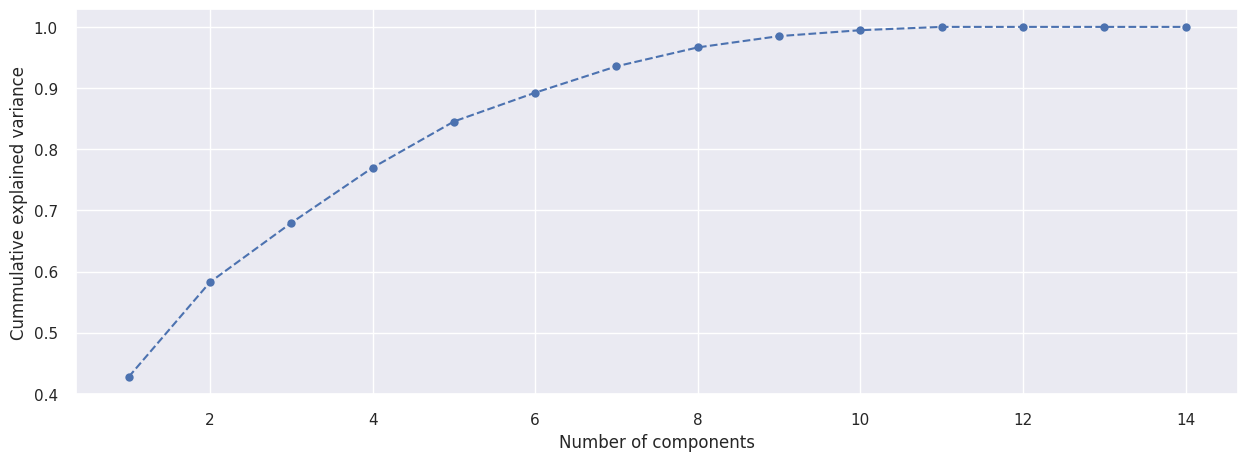

In [152]:
#Plot variance ratio of PCs
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

print('Percentage of cumulative variance of PCs: ', pca.explained_variance_ratio_.cumsum() * 100)

#Plot cummulative explained variance
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('Number of components')
plt.ylabel('Cummulative explained variance')
plt.show()

Note:
The number of components we choose ultimately depends on our preference. Typically, it is recommended that the total variance explained by all components should be between 70% to 80%, which would equate to roughly 6 components in this case. Despite this, for the present example, only 3 components will be selected, which should preserve a little over 55% of the variance. While this may not be ideal in social sciences, it is still a reasonable level of variance retention. PC1 is responsible for around 36% of the overall variation in the dataset and has the greatest impact on it.

## Perform PCA with the chosen number of components

In [153]:
# We choose 3 components
pca = PCA(n_components = 3)

# Fit the model with our data with the 3 selected components
pca.fit(merged_df)

# The calculated resulting components scores for the elements in our data set:
df_pca = pca.transform(merged_df)
df_pca = pd.DataFrame(df_pca, columns=['D1', 'D2', 'D3'])
df_pca

,D1,D2,D3
0,-3,2,1
1,1,-0,-0
2,-1,0,1
3,2,-1,0
4,0,1,-2
...,...,...,...
2198,-2,3,-0
2199,2,2,-2
2200,-2,-3,1
2201,-1,-0,0


In [154]:
loadings = pca.components_

#create a dataframe of PC loadings/scores
df_loadings = pd.DataFrame(loadings.T)

# 16 PCs scores with 23 col names
#df_loadings.insert(0, 'col_name', df_before_scale.columns)
df_loadings.insert(0, 'col_name', merged_df.columns)
df_loadings

,col_name,0,1,2
0,Income,-0,0,-0
1,Recency,-0,0,-1
2,Total_Sales,-0,0,-0
3,NumWebVisitsMonth,0,0,0
4,Avg_Purchase,-0,0,-0
5,Deal_Share,0,0,-0
6,Web_Share,0,1,0
7,Catalog_Share,-0,0,-0
8,Store_Share,0,-1,0
9,Family_Size,0,0,-1


The variables Income and Total_Sales make the most significant contribution to PC1 (Avg_Purchase is also based on Total_Sales). The variables Store_Share and Web_Share are the primary contributors to PC2.

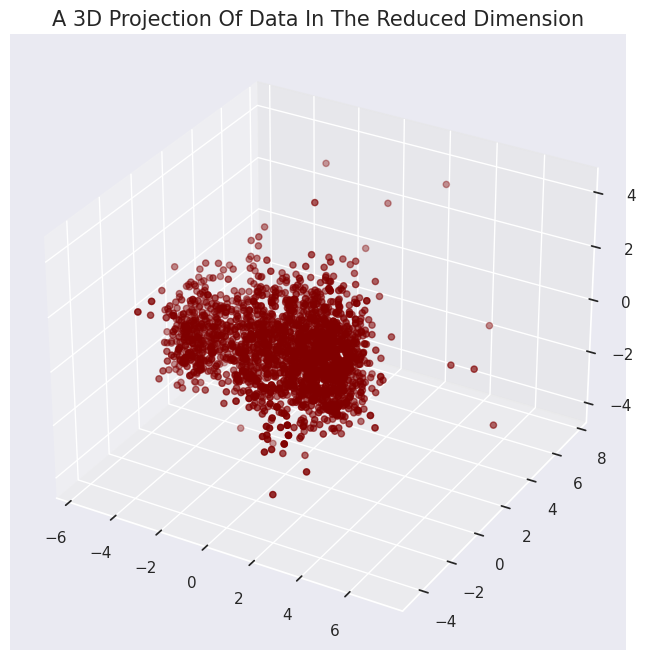

In [155]:
#Plot PCA
#A 3D Projection Of Data In The Reduced Dimension
x =df_pca["D1"]
y =df_pca["D2"]
z =df_pca["D3"]
#To plot
fig = plt.figure(figsize=(10,8))
a = fig.add_subplot(111, projection="3d")
a.scatter(x,y,z, c="maroon", marker="o" )
a.set_title("A 3D Projection Of Data In The Reduced Dimension", size=15)
plt.show()

# Kmeans

Brief Clustering
- Stars: Old customers with high income and high spending nature.
- Neet Attention: New customers with below-average income and low - spending nature.
- High Potential: New customers with high income and high spending nature.
- Leaky Bucket: Old customers with below-average income and a low spending nature.

In [156]:
scaler=StandardScaler()
dataset_temp = customer_data[['Income','Seniority','Total_Sales']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')
gmm=GaussianMixture(n_components=5, covariance_type='spherical',max_iter=2000, random_state=5).fit(X)
labels = gmm.predict(X)
dataset_temp['Cluster'] = labels
dataset_temp=dataset_temp.replace({0:'Cluster1',1:'Cluster2',2:'Cluster3',3:'Cluster4',4:'Cluster5'})
customer_data['Cluster']=dataset_temp['Cluster']

<ipython-input-156-3adda6f45a4f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_temp['Cluster'] = labels


In [157]:
pd.options.display.float_format = "{:.0f}".format
summary=customer_data[['Income','Total_Sales','Seniority','Cluster']]
summary.set_index("Cluster", inplace = True)
summary=summary.groupby('Cluster').describe().transpose()
summary

Cluster            Cluster1  Cluster2  Cluster3  Cluster4  Cluster5
Income      count       450       534       474       327       418
            mean      44230     68983     36149     28333     73393
            std       11283     11649     11943      9682      9678
            min       16248      2447      6835      1730     50334
            25%       35864     60745     27713     21982     65786
            50%       44557     68212     37264     28520     72906
            75%       53198     77607     45740     35791     79945
            max       69139    105471     60544     47025    113734
Total_Sales count       450       534       474       327       418
            mean        166      1219       204        94      1161
            std         163       450       180       108       436
            min           8       260         8         8       277
            25%          46       882        57        32       827
            50%          89      1178       131        53      1095
            75%         262      1538       318        94      1448
            max         731      2524       839       542      2525
Seniority   count       450       534       474       327       418
            mean          9        24        24        15        11
            std           4         4         4         3         4
            min           0        16        17         6         0
            25%           6        20        21        13         8
            50%           8        23        24        16        12
            75%          12        27        27        18        14
            max          17        35        35        21        17

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

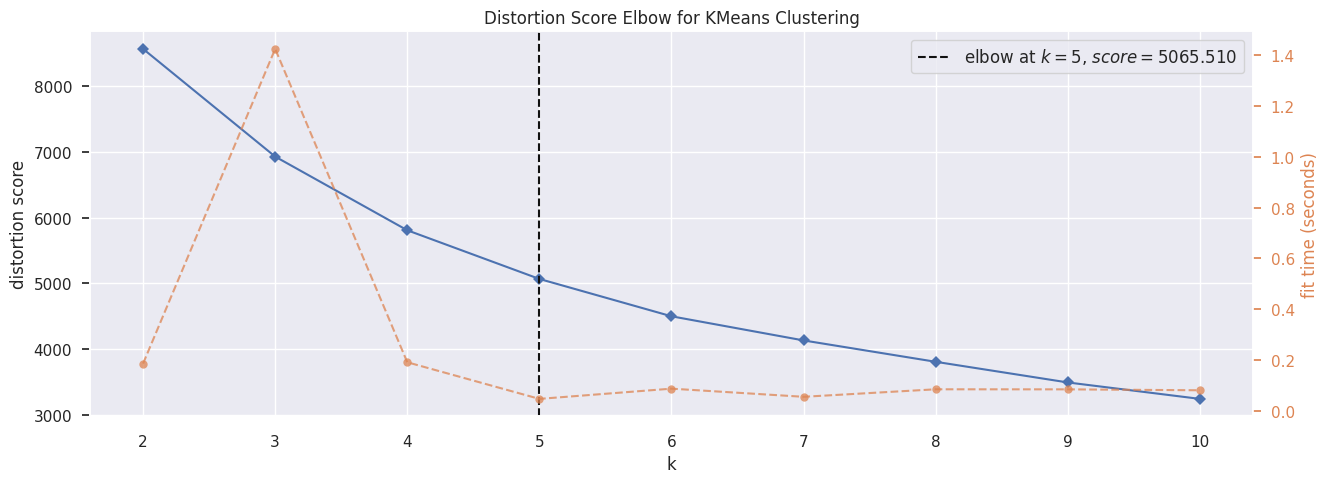

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [158]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

In [159]:
# Specify the number of clusters to create
n_clusters = 5

# Create the KMeans model
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to the data
kmeans.fit(merged_df)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
customer_data['Cluster_5'] = labels

customer_data.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Avg_Purchase,Deal_Share,Web_Share,Catalog_Share,Store_Share,Family_Size,Seniority,AgeBinned,Cluster,Cluster_5
0,5524,1957,Basic education,Alone,58138,0,0,2012-04-09,58,635,...,65,0,0,0,0,1,32,61+,Cluster2,2
1,2174,1954,Basic education,Alone,46344,1,1,2014-08-03,38,11,...,4,0,0,0,0,3,4,61+,Cluster1,1
2,4141,1965,Basic education,Pair,71613,0,0,2013-08-21,26,426,...,37,0,0,0,0,2,16,51-60,Cluster5,0
3,6182,1984,Basic education,Pair,26646,1,0,2014-10-02,26,11,...,7,0,0,0,0,3,2,31-40,Cluster1,3
4,5324,1981,Higher education,Pair,58293,1,0,2014-01-19,94,173,...,22,0,0,0,0,3,11,41-50,Cluster1,1


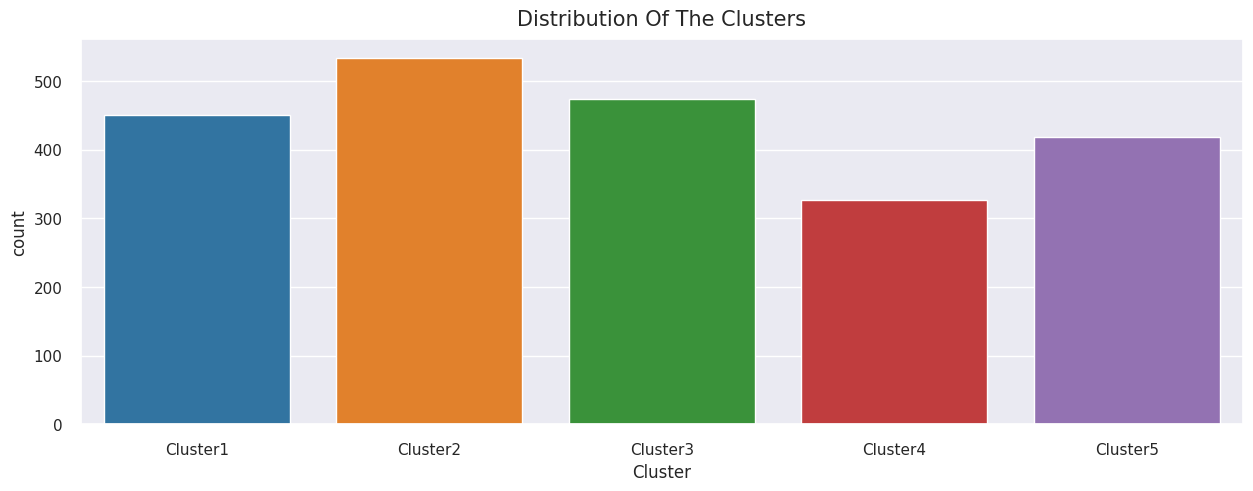

In [160]:
#Plotting countplot of clusters
df1=customer_data.sort_values(by='Cluster')
pl = sns.countplot(x=df1['Cluster'], palette= pal)
pl.set_title("Distribution Of The Clusters", pad=10, size = 15)
plt.show()

In [161]:
#Define name of customer groups according to clusters
re_clust = {
    'Cluster1':'Ordinary',
    'Cluster2':'Potential',
    'Cluster3':'Good',
    'Cluster4':'Elite',
    'Cluster5':'Stars'}
df1['Clusters_Customers'] = df1['Cluster'].map(re_clust)
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Deal_Share,Web_Share,Catalog_Share,Store_Share,Family_Size,Seniority,AgeBinned,Cluster,Cluster_5,Clusters_Customers
951,6387,1976,Higher education,Pair,52190,1,1,2014-08-05,39,42,...,0,0,0,0,4,4,41-50,Cluster1,1,Ordinary
1904,10951,1968,Basic education,Pair,45688,0,1,2014-01-25,20,279,...,0,0,0,1,3,10,51-60,Cluster1,3,Ordinary
1907,10680,1986,Basic education,Pair,33235,1,0,2014-05-02,71,45,...,0,0,0,0,3,7,31-40,Cluster1,1,Ordinary
893,9960,1991,Basic education,Alone,26868,1,0,2014-04-30,52,0,...,0,0,0,0,2,7,31-40,Cluster1,3,Ordinary
422,6528,1982,Higher education,Pair,18492,1,0,2014-05-06,75,2,...,0,0,0,0,3,7,41-50,Cluster1,3,Ordinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,486,1988,Basic education,Pair,84219,0,0,2014-02-02,27,434,...,0,0,0,1,2,10,31-40,Cluster5,2,Stars
1513,9264,1986,Basic education,Pair,79529,0,0,2014-04-27,1,423,...,0,0,0,0,2,7,31-40,Cluster5,2,Stars
875,4789,1953,Basic education,Pair,80812,0,0,2013-09-17,95,769,...,0,0,0,0,2,15,61+,Cluster5,2,Stars
1990,10949,1963,Higher education,Alone,72968,0,0,2013-12-16,8,1092,...,0,0,0,0,1,12,51-60,Cluster5,2,Stars


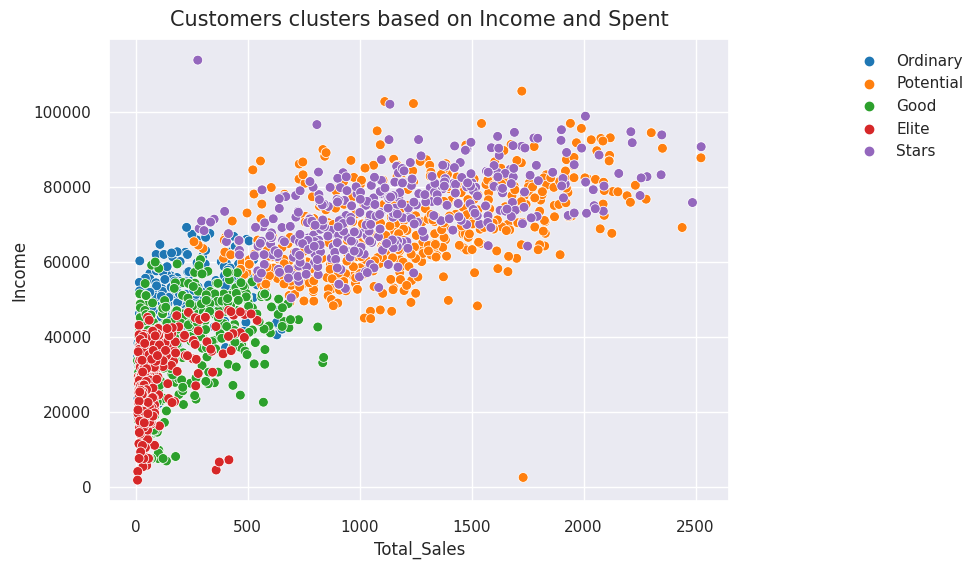

In [162]:
#Plot clusters of customers based on Income and Spent
plt.figure(figsize=(8, 6))
pl = sns.scatterplot(data = df1, x = df1['Total_Sales'], y = df1['Income'], hue = df1['Clusters_Customers'], palette = pal, s=50)
pl.set_title('Customers clusters based on Income and Spent', pad=10, size=15)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.4, 1))
plt.show()


Clustering
- Cluster 1 (Ordinary): low spending and low income
- Cluster 2 (Potential): low spending and below average income
- Cluster 3 (Good): low spending and average income
- Cluster 4 (Elite): high spending and above average income
- Cluster 5 (Stars): high spending and high income

Clustering based on shoping
- Deal_Share
- Wed_Share
- Catalog_Share
- Store_Share


In [163]:
spending_by_product = df1.groupby('Clusters_Customers')[['Deal_Share','Web_Share','Catalog_Share','Store_Share']].sum()

#Transpose the result
spending_by_product = spending_by_product.transpose()

#Reset the index 
spending_by_product = spending_by_product.reset_index()

#Rename column
spending_by_product = spending_by_product.rename(columns = {'index': 'Category'})

spending_by_product

Clusters_Customers,Category,Elite,Good,Ordinary,Potential,Stars
0,Deal_Share,83,121,101,58,35
1,Web_Share,86,130,118,146,109
2,Catalog_Share,18,36,34,121,104
3,Store_Share,141,188,196,209,170


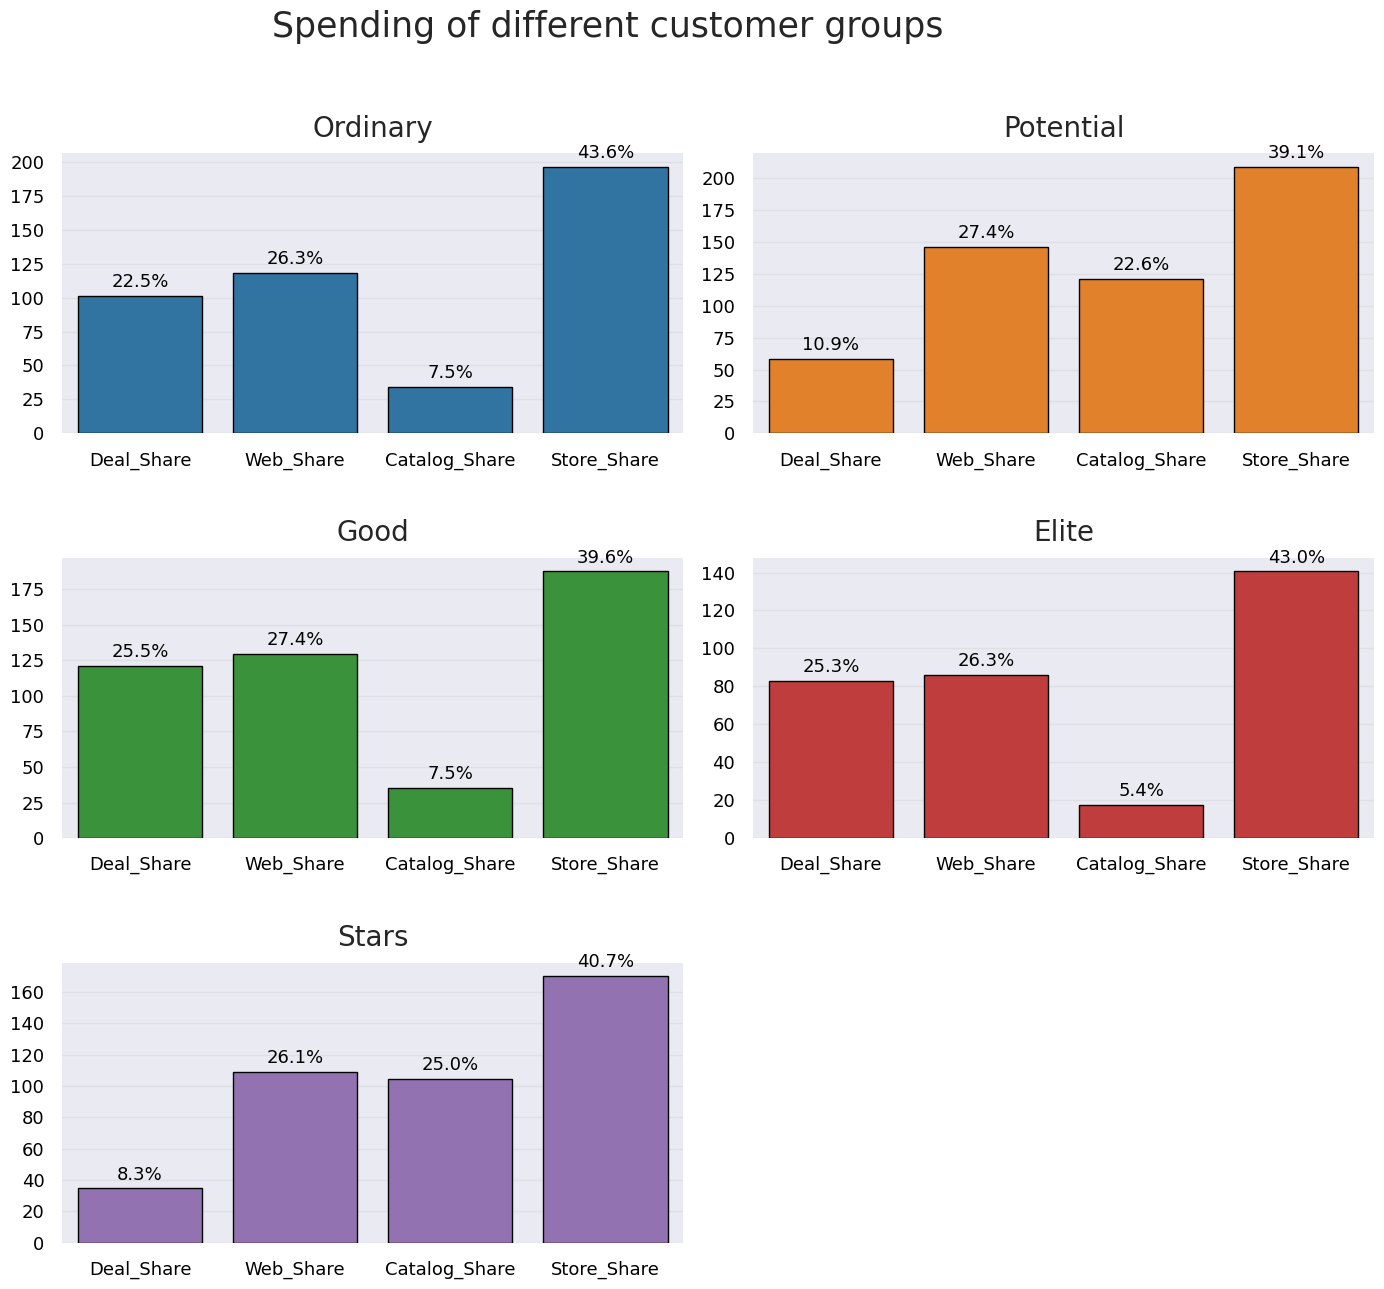

In [164]:
# Plot bar charts
#Creates a figure with 4 subplots using the subplots() function from matplotlib
fig = plt.figure(figsize=(14, 12)) 

#Initializes k=1 and creates a list cl of strings representing the names of each customer cluster
k = 1
cl = ['Ordinary','Potential','Good','Elite','Stars']

#
for i in cl:
    #only the columns Category and i are selected, where i is the current iteration of the cl list 
    ass = spending_by_product[['Category', i]]
    
    #create a subplot in a grid with 2 rows and 2 columns, and it sets the current subplot to the k position
    plt.subplot(3, 2, k)
    plt.title(i, size = 20, x = 0.5, y = 1.03)
    plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.1)
    cluster_color = pal[k-1]
    
    #create barplot using seaborn where x is products in the category, y is the current iteration of the cl list
    a = sns.barplot(data = ass, x = 'Category', y = i, color = cluster_color, linestyle = "-", linewidth = 1, edgecolor = "black")
    plt.xticks(size = 13, color = 'black')
    plt.yticks(size = 13, color = 'black')
    plt.xlabel('')
    plt.ylabel('')
    
    #add annotations to the barplot by percentage of spending amount
    for p in a.patches:
        #set the x-coordinate to the center of the current bar patch
        x_pos = p.get_x() + p.get_width() / 2
        
        #get the height of the current patch
        y_pos = p.get_height()
        
        #calculate percentage of spending amount (current patch) and the total spending of the group
        percentage = round((y_pos / sum(ass[i])) * 100, 1)
        a.annotate(
            f'{percentage}%', #text to be displayed
            xy=(x_pos, y_pos), #position to be placed
            ha='center', va='center', #alignment of the text
            size=13, 
            color='black',
            xytext = (0, 10), 
            textcoords = 'offset points')
    
    #hide spines of the barplot (the right, top, left and bottom borders)
    for spine in ['right', 'top', 'left', 'bottom']:
        a.spines[spine].set_visible(False)
        
    #increment k after iteration of the loop
    k += 1

plt.figtext(0.2, 1.05, 'Spending of different customer groups', size = 25)
fig.tight_layout(h_pad = 3)
plt.show()